In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [2]:
np.random.seed(15)
n_samples = 30
true_fun = lambda X: X**2 -2*X +3
X = np.random.choice(np.linspace(-1,4),n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.3
X = np.vstack(X)

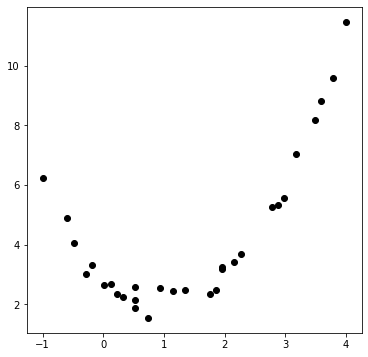

In [3]:
plt.figure(figsize=(6,6));
plt.scatter(X, y,  color='black')

Tworzymy trzy modele:
 - pierwszy charakteryzuje się zbyt małym dopasowaniem (underfitting) i jest zwykłą funckją liniową
 - drugi ma zbyt duże dopasowanie (overfitting) i jest wielomianem 15 rzędu
 - trzeci jest wielomianem drugiego stopnia tak jak nasza prawdziwa funkcja (true_fun)

In [4]:
model1 = LinearRegression()
model1.fit(X, y)
model15 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model15.fit(X, y)
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model2.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Tworzymy wykres wartości rzeczywistych i wartości przewidzianych przez nasze modele

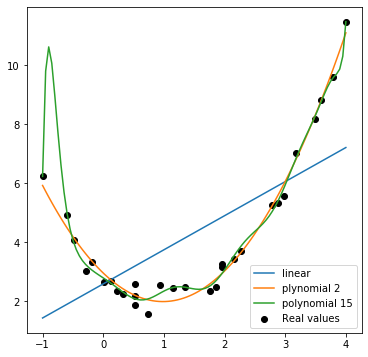

In [5]:
x_plot = np.linspace(min(X),max(X),100)
x_plot = np.vstack(x_plot)
plt.figure(figsize=(6,6))
plt.scatter(X, y,  color='black')
plt.plot(x_plot,model1.predict(x_plot))
plt.plot(x_plot,model2.predict(x_plot))
plt.plot(x_plot,model15.predict(x_plot))
plt.legend(['linear','plynomial 2','polynomial 15','Real values'])
plt.show()

Następnie należy policzyć i wyświetlić MSE dla każdego z modeli w celu ich porównania

In [6]:
print(metrics.mean_squared_error(y_true = y, y_pred= model1.predict(X)))
print(metrics.mean_squared_error(y_true = y, y_pred= model15.predict(X)))
print(metrics.mean_squared_error(y_true = y, y_pred= model2.predict(X)))

3.5010116507366873
0.04097885347207213
0.09038733050395723


# Teraz zastosujemy podział na dane trenujące i testowe

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

Ponownie tworzymy trzy modele, ale teraz wyłącznie na danych "_train"

In [27]:
mdl1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
mdl1.fit(X_train, y_train)
mdl15 = make_pipeline(PolynomialFeatures(15), LinearRegression())
mdl15.fit(X_train, y_train)
mdl2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
mdl2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Wizualizacja dopasowań dla danych trenujących

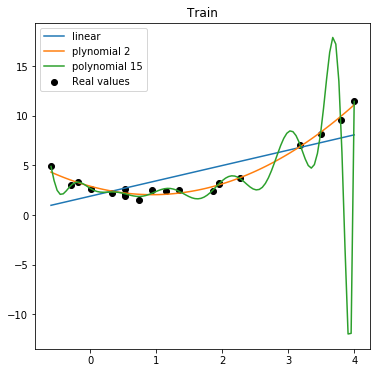

In [28]:
x_plot = np.linspace(min(X_train),max(X_train),100)
x_plot = np.vstack(x_plot)
plt.figure(figsize=(6,6))
plt.scatter(X_train, y_train,  color='black')
plt.plot(x_plot,mdl1.predict(x_plot))
plt.plot(x_plot,mdl2.predict(x_plot))
plt.plot(x_plot,mdl15.predict(x_plot))
plt.title('Train')
plt.legend(['linear','plynomial 2','polynomial 15','Real values'])
plt.show()

Wyliczenie MSE dla danych trenujących

In [29]:
print(metrics.mean_squared_error(y_true = y_train, y_pred= mdl1.predict(X_train)))
print(metrics.mean_squared_error(y_true = y_train, y_pred= mdl15.predict(X_train)))
print(metrics.mean_squared_error(y_true = y_train, y_pred= mdl2.predict(X_train)))

2.925865632845592
0.02753846836278397
0.10743910726425006


Wizualizacja dopasowań dla danych testujących

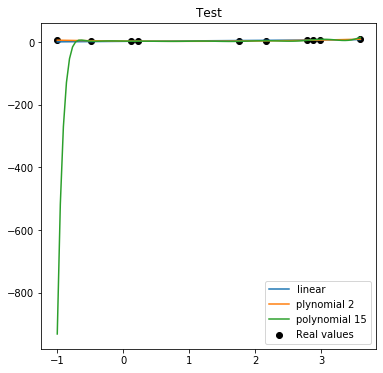

In [30]:
x_plot = np.linspace(min(X_test),max(X_test),100)
x_plot = np.vstack(x_plot)
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test,  color='black')
plt.plot(x_plot,mdl1.predict(x_plot))
plt.plot(x_plot,mdl2.predict(x_plot))
plt.plot(x_plot,mdl15.predict(x_plot))
plt.title('Test')
plt.legend(['linear','plynomial 2','polynomial 15','Real values'])
plt.show()

Wyliczenie MSE dla danych testujących

In [31]:
print(metrics.mean_squared_error(y_true = y_test, y_pred= mdl1.predict(X_test)))
print(metrics.mean_squared_error(y_true = y_test, y_pred= mdl15.predict(X_test)))
print(metrics.mean_squared_error(y_true = y_test, y_pred= mdl2.predict(X_test)))

5.643897136387426
88040.05872704758
0.0829793228425591
